In [1]:
import numpy as np
import numba as nb

import multiprocessing as mp

import matplotlib.pyplot as plt
from time import clock
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import os

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from pre_fun import *

import matplotlib.ticker as ticker

In [389]:
sol_list_high = []
voltage_list_high = [ 100e-3, 200e-3, 300e-3, 400e-3, 450e-3]

In [7]:
# Setup
# sol_list = []

voltage_list = [5e-3, 10e-3, 15e-3, 20e-3,]# 100e-3, 200e-3, 200e-3, 300e-3, 300e-3]


for i in range( 2 ): #voltage_list_high.__len__() ):
    print(i)
    stp4 = Setup(  I = 500,
                    N = 2 ** 15,
                    Dt = 1e-4,
                    T = 300,
                    L = 10,
                    lengthscale = 1e9,
                    c0_in = 1.0,
                    DA = 1.0,
                    DC = 1.0,
                    D0_in = 1e-12,
                    epsilon = 1.0,
                    epsilon_m = 80.0,
                    testname = "imp_model_1_4",
                    model = 1,
                   sim_method = "single_const",
                   kA = 1e0,
                   kC = 1e0,
                   foxA = 0.5e0,
                   foxC = 0.5e0, 
                     steady_state_tol = 1e-6,)

    # set pertubation voltage
    stp4.set_input_voltage_data( voltage_list[i] )

    # call solver
    solver( stp4 )
    
    sol_list.append( stp4.sol_data[:,-1])
    cur_list.append( stp4.current_data)
    
    #del stp4

0
Start 'single_const' Simulation
Time Step:  1
Time Step:  2
Time Step:  3
Time Step:  4
Time Step:  5
Time Step:  6
Time Step:  7
Time Step:  8
Time Step:  9
Time Step:  10
Time Step:  11
Time Step:  12
Time Step:  13
Time Step:  14
Time Step:  15
Time Step:  16
Time Step:  17
Time Step:  18
Time Step:  19
Time Step:  20
Time Step:  500


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\nonlin.py:474: RuntimeWarning: invalid value encountered in double_scalars
  and dx_norm/self.x_rtol <= x_norm))


Time Step:  1000
Time Step:  1500
Time Step:  2000
Time Step:  2500
Time Step:  3000
Time Step:  3500
Time Step:  4000
Time Step:  4500
Time Step:  5000
Time Step:  5500
Time Step:  6000
Steady State reached
Save Results
1
Start 'single_const' Simulation
Time Step:  1
Time Step:  2
Time Step:  3
Time Step:  4
Time Step:  5
Time Step:  6
Time Step:  7
Time Step:  8
Time Step:  9
Time Step:  10
Time Step:  11
Time Step:  12
Time Step:  13
Time Step:  14
Time Step:  15
Time Step:  16
Time Step:  17
Time Step:  18
Time Step:  19
Time Step:  20
Time Step:  500
Time Step:  1000
Time Step:  1500
Time Step:  2000
Time Step:  2500
Time Step:  3000
Time Step:  3500
Time Step:  4000
Time Step:  4500
Time Step:  5000
Time Step:  5500
Time Step:  6000
Time Step:  6500
Time Step:  7000
Time Step:  7500
Time Step:  8000
Time Step:  8500
Time Step:  9000
Time Step:  9500
Time Step:  10000
Time Step:  10500
Time Step:  11000
Time Step:  11500
Time Step:  12000
Time Step:  12500
Time Step:  13000
Time S

In [9]:
stp4.current_data

AttributeError: 'Setup' object has no attribute 'current_data'

In [99]:
stp4 = Setup(  I = 500,
                    N = 2 ** 13,
                    Dt = 1e-4,
                    T = 300,
                    L = 10,
                    lengthscale = 1e9,
                    c0_in = 1.0,
                    DA = 1.0,
                    DC = 1.0,
                    D0_in = 1e-12,
                    epsilon = 1.0,
                    epsilon_m = 80.0,
                    testname = "imp_model_1_4",
                    model = 0,
                   sim_method = "single_const",
                   kA = 0e0,
                   kC = 0e0,
                   foxA = 0.e0,
                   foxC = 0.e0, )

In [5]:
_, centers = calcAxis( stp4.I )

L = stp4.L

# def plot_solution( I, sol, centers, L)





def interactivePlotting( I, sol_arg, centers, L, plotindex = None, markers = None,
                        styles = None, labels = None, savename = None ):
    """
    Plotting time dependent solutions
    """
    label_flag = 0
    marker_flag = 0
    style_flag = 0
    
    # check input
    if isinstance( sol_arg, np.ndarray):
        # normal or interactive plot mode
        
        if plotindex is None and not sol_arg.shape.__len__() == 1:
            
            raise ValueError('Dimension mismatch, have to give plotindex')
        
        elif sol_arg.shape.__len__() == 1:
            
            sol_plot = [ sol_arg ]
            
            # extraxt ion/pot max and min on yaxis and xaxis
            cmin = sol_arg[0:2*I].min() - sol_arg[0:2*I].min() * 0.05
            cmax = sol_arg[0:2*I].max() + sol_arg[0:2*I].max() * 0.05

            phimin = sol_arg[2*I:3*I].min() - sol_arg[2*I:3*I].min() * 0.05
            phimax = sol_arg[2*I:3*I].max() + sol_arg[2*I:3*I].max() * 0.05
        
        elif isinstance(plotindex, int) and sol_arg.shape.__len__() == 2:
            
            sol_plot = [ sol_arg[:,plotindex] ]
            
            # extraxt ion/pot max and min on yaxis and xaxis
            cmin = sol_arg[0:2*I,:].min() - sol_arg[0:2*I,:].min() * 0.05
            cmax = sol_arg[0:2*I,:].max() + sol_arg[0:2*I,:].max() * 0.05

            phimin = sol_arg[2*I:3*I,:].min() - sol_arg[2*I:3*I,:].min() * 0.05
            phimax = sol_arg[2*I:3*I,:].max() + sol_arg[2*I:3*I,:].max() * 0.05
            
    elif isinstance( sol_arg, list):
        # plot single sol pictures
        
        sol_plot = sol_arg
        
        cmin_tmp = min([ el[0:2*I].min() for el in sol_plot ])
        cmax_tmp = max([ el[0:2*I].max() for el in sol_plot ])
        
        pmin_tmp = min([ el[2*I:3*I].min() for el in sol_plot ])
        pmax_tmp = max([ el[2*I:3*I].max() for el in sol_plot ])
        
        # extraxt ion/pot max and min on yaxis and xaxis
        cmin = cmin_tmp - cmin_tmp * 0.05
        cmax = cmax_tmp +  cmax_tmp * 0.05

        phimin = pmin_tmp - pmin_tmp * 0.05
        phimax = pmax_tmp + pmax_tmp * 0.05
        
    if not markers is None:
    
        if not isinstance(markers, list) or not markers.__len__() == sol_plot.__len__():
            
            raise ValueError('Markers have to be a list with same length as sol_arg!')
            
        else:
            
            marker_flag = 1
    
    if not styles is None:
        
        if not isinstance(styles, list) or not styles.__len__() == sol_plot.__len__():
            
            raise ValueError('Styles have to be a list with same length as sol_arg!')
            
        else:
            
            style_flag = 1
            
    if not labels is None:
        
        if not isinstance(labels, list) and not labels.__len__() == sol_plot.__len__():
            
            raise TypeError('Labels have to be a list with same length as sol_arg!')
        
        else:
            
            label_flag = 1
            
    xmin = - L/30.
    xmax = L + L/30.
    
    fig = plt.figure( dpi = 120 )
    
    # create axes
    ax = fig.add_subplot(2,1,1)
    ax1 = fig.add_subplot(2,1,2, sharex = ax)
    
    # iterate over sol_plot list
    for i in range(0, sol_plot.__len__() ):
        
        # cations
        c_line = ax.plot(centers * L, sol_plot[i][0:I], color = "blue", alpha = 0.7, lw = 1.4,)[0];
        
        # anions
        a_line = ax.plot(centers * L, sol_plot[i][I:2*I], color = "red",alpha = 0.7, lw = 1.4,)[0];
        
        # potential
        p_line = ax1.plot(centers * L, sol_plot[i][2*I:3*I],alpha = 0.7, color = "black", lw = 1.4,)[0];
        
        print(p_line)
        
        if marker_flag == 1:
            
            c_line.set_marker(markers[i])
            c_line.set_markersize(4)
            c_line.set_markevery(10)
            
            a_line.set_marker(markers[i])
            a_line.set_markersize(4)
            a_line.set_markevery(10)
            
            p_line.set_marker(markers[i])
            p_line.set_markersize(4)
            p_line.set_markevery(10)
            
        if style_flag == 1:
            
            c_line.set_linestyle(styles[i])
            a_line.set_linestyle(styles[i])
            p_line.set_linestyle(styles[i])
            
        if label_flag == 1:
            
           # c_line.set_label(labels[i])
            #a_line.set_label(labels[i])
            p_line.set_label(labels[i])
            
    # axis spec 
    
    # labels
    ax.set_ylabel(r"Concentration [M]")
    ax1.set_xlabel(r"x [nm]")
    ax1.set_ylabel(r"Potential [mV]")

    # grids
    ax.grid(b=True, which = 'major', axis = 'both')
    ax1.grid(b=True, which = 'major', axis = 'both')
    
    # axis ticks
    plt.setp(ax.get_xticklabels(), visible = False)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1f"))
    ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter("%1.1f"))
    
    ax.set_xticklabels(ax.get_xticklabels(), fontsize = 8)
    ax1.set_xticklabels(ax1.get_xticklabels(), fontsize = 8)
    
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    
    # fill anode catode
    ax.fill_between( [xmin,0],cmin, cmax, facecolor = "red", alpha = 0.4)
    ax1.fill_between( [xmin,0],phimin, phimax, facecolor = "red", alpha = 0.4)
    
    ax.fill_between( [L,xmax+1],cmin, cmax, facecolor = "blue", alpha = 0.4)
    ax1.fill_between( [L,xmax+1],phimin, phimax, facecolor = "blue", alpha = 0.4)
    
    # annotate anode catode
    ax.text(0.005, 0.56, 'Anode', rotation=90,transform=ax.transAxes, fontsize = 8)
    ax1.text(0.005, 0.56, 'Anode', rotation=90,transform=ax1.transAxes, fontsize = 8)
    
    ax.text(0.975, 0.56, 'Catode', rotation=90,transform=ax.transAxes, fontsize = 8)
    ax1.text(0.975, 0.56, 'Catode', rotation=90,transform=ax1.transAxes, fontsize = 8)
    
    # set ax limits
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([cmin, cmax])
    ax1.set_ylim([phimin, phimax])
    
    # legend
    handles, labels = ax.get_legend_handles_labels()
    handles1, labels1 = ax1.get_legend_handles_labels()
    
    if label_flag == 1:
        
        ax1.legend(handles + handles1, labels + labels1, loc = 9, bbox_to_anchor = (0.55,-0.15), fancybox = True, ncol = 2 )
    
    fig.tight_layout()
    
    if isinstance(savename, str):
        
        for fmt in ['png', 'pdf']:
            fig.savefig(savename + '.' + fmt, dpi = 300, format = fmt, bbox_inches = 'tight' )
    
    plt.show()
    
    # new figure for current
    fig2 = plt.figure( dpi = 120 )
    
    # create axes
    ax2 = fig2.add_subplot(1,1,1)
    
    
    
    if isinstance(savename, str):
        
        for fmt in ['png', 'pdf']:
            fig.savefig(savename + '_current.' + fmt, dpi = 300, format = fmt, bbox_inches = 'tight' )
    
    plt.show()

# plot solution

# interact( interactivePlotting,plotindex =widgets.IntSlider(min = 0, max = stp4.N-1, value = 0),
#          I = fixed(stp4.I), sol = fixed(stp4.sol_data), centers = fixed(centers), L = fixed(L) );


Line2D(_line0)


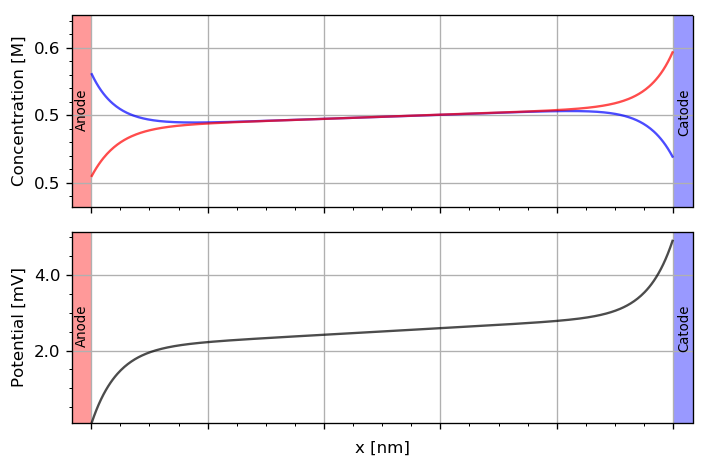

In [6]:
markers = ['.','^','s', 'o',]# '1', 's',  ]
styles = [':', '--', '-','--',]# '--', '-', ]
labels = [ 100e-3, 200e-3, 150e-3, 50e-3, ]
# labels = ["5e-3", "10e-3", "15e-3", "20e-3", "100e-3", "300e-3"]

interactivePlotting( 500, sol_list, centers, L, plotindex = 0, )
                   # markers = markers, styles = styles,
                   # labels = labels,  savename = "model_0_sweep_limit" );




In [384]:
sol_list_high.append(sol_list[-2])

In [306]:
# plot current
def plotCurrent( )
fig = plt.figure( dpi = 120 )

ax = fig.add_subplot(1,1,1)

ax.plot()

 if isinstance(savename, str):
        
        for fmt in ['png', 'pdf']:
            fig.savefig(savename + '.' + fmt, dpi = 300, format = fmt, bbox_inches = 'tight' )

plt.show()

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Places a legend on the axes.
    
    To make a legend for lines which already exist on the axes
    (via plot for instance), simply call this function with an iterable
    of strings, one for each legend item. For example::
    
        ax.plot([1, 2, 3])
        ax.legend(['A simple line'])
    
    However, in order to keep the "label" and the legend element
    instance together, it is preferable to specify the label either at
    artist creation, or by calling the
    :meth:`~matplotlib.artist.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        # Overwrite the label by calling the method.
        line.set_label('Label via method')
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label starting with an underscore.
    This is default for all artists, so calling :meth:`leg

In [ ]:
class singleSineSim():
    
    # fit function
    def fitCurrent( self, independent, y0, k0, k1 ):
    """
    Independent input parameters, list:
        
        independent[0] = time axis
        independent[1] = frequency
        independent[2] = reference time T0
        
    """
    
    time = independent[0]
    freq = independent[1]
    T0 = independent[2]
    
    return y0 + k0 * np.sin( 2 * np.pi * freq * time *T0 ) + k1 * np.cos( 2 * np.pi * freq * time *T0 )
    
    # fitting
    def fitting( self, ):
        popt, pcov = curve_fit( fitCurrent, [t[1:],freq,T0], current[0,1:],  )
   
    
        # calculate parameters for current
        A = np.sqrt( popt[1] ** 2 + popt[2] ** 2 ) * f0 * _ELE_CHARGE * 1e17
        phase = np.arctan( popt[2] / popt[1])
        
        # calculate impedance
        Z = np.abs( U0 * phi0 ) * np.exp(1j * phase) / np.abs(A)
        
        return
        
    
    
    
    # saving
    if os.path.isfile(testname):
        with open(testname, mode = "a") as file_id:

            np.savetxt(file_id, savearray, delimiter = ",", newline = "\n")

    else:
        with open(testname, mode = "w") as file_id:

                    np.savetxt(file_id, savearray, delimiter = ",", newline = "\n")
    
    # plotting
    fig = plt.figure( dpi = 120 )

    ax = fig.add_subplot(1,1,1)

    # input voltage
    ax.plot(t[1:], phiC[1:], color = "blue")

    # anodic current
    ax.plot(t[1:], current[0,1:], color = "red")

    # plot fitted current
    ax.plot( t[1:], fitCurrent( [t[1:], freq, T0], popt[0], popt[1], popt[2] ) , ls = "--", color = "black")


    plt.show()
    

In [ ]:
# fit function
def fitCurrent( independent, y0, k0, k1 ):
    """
    Independent input parameters, list:

        independent[0] = time axis
        independent[1] = frequency
        independent[2] = reference time T0

    """

    time = independent[0]
    freq = independent[1]
    T0 = independent[2]

    return y0 + k0 * np.sin( 2 * np.pi * freq * time *T0 ) + k1 * np.cos( 2 * np.pi * freq * time *T0 )


# # fitting
#popt, pcov = curve_fit( fitCurrent, [t[1:],freq,T0], current[0,1:]  )
   
    
# calculate parameters for current
#A = np.sqrt( popt[1] ** 2 + popt[2] ** 2 ) * f0 * _ELE_CHARGE * 1e17
#phase = np.arctan( popt[2] / popt[1])

# calculate impedance
#Z = np.abs( U0 * phi0 ) * np.exp(1j * phase) / np.abs(A)


 

#A = popt[1]
#phase = popt[2]



# print("A", A)
# print("phase", np.rad2deg(phase))
# print("Impedance", Z)

# saving impedance results
#savearray = np.array([[ freq, Z, Dt, N, I, simtime  ]])

# plotting
fig = plt.figure( dpi = 120 )

ax = fig.add_subplot(1,1,1)

# input voltage
ax.plot(t[1:], phiC[1:], color = "blue")

# current on different axis
ax1 = ax.twinx()

# anodic current

ax1.plot(t[1:], current2[0,1:], color = "green")
ax1.plot(t[1:], current3[0,1:], color = "green")
ax1.plot(t[1:], current4[0,1:], color = "green")
ax1.plot(t[1:], current1[0,1:], color = "red")
# plot fitted current
#ax1.plot( t[1:], fitCurrent( [t[1:], freq, T0], popt[0], popt[1], popt[2] ) , ls = "--", color = "black")


plt.show()

In [ ]:
Fcurrent1 = np.fft.fft( current1[0,:] )[0:int(stp2.N/2)]
Fcurrent2 = np.fft.fft( current2[0,:] )[0:int(stp2.N/2)]
Fcurrent3 = np.fft.fft( current3[0,:] )[0:int(stp2.N/2)]
Fcurrent4 = np.fft.fft( current4[0,:] )[0:int(stp2.N/2)]

# plotting
fig = plt.figure( dpi = 120 )

ax = fig.add_subplot(1,1,1)

#ax.plot( freq_ax, Fcurrent1.real, color = "blue" )
ax.plot( freq_ax, Fcurrent1.real, color = "red" )
#ax.plot( freq_ax, Fcurrent2.real, color = "black", ls = "--" )
ax.plot( freq_ax, Fcurrent2.real, color = "blue", ls = "-" )
ax.plot( freq_ax, Fcurrent3.real, color = "black", ls = "-" )
#ax.plot( freq_ax, Fcurrent4.real, color = "green", ls = "-" )

In [ ]:
# saving
if os.path.isfile(testname):
    with open(testname, mode = "a") as file_id:
        
        np.savetxt(file_id, savearray, delimiter = ",", newline = "\n")
        
else:
    with open(testname, mode = "w") as file_id:
        
                np.savetxt(file_id, savearray, delimiter = ",", newline = "\n")